In [1]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

In [2]:
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.layers = nn.ModuleList([nn.Linear(10 if i == 0 else 50, 50) for i in range(20)])
        self.final_layer = nn.Linear(50, 1)

    def forward(self, x):
        for layer in self.layers:
            # x = torch.sigmoid(layer(x))
            x = torch.relu(layer(x))
        return self.final_layer(x)

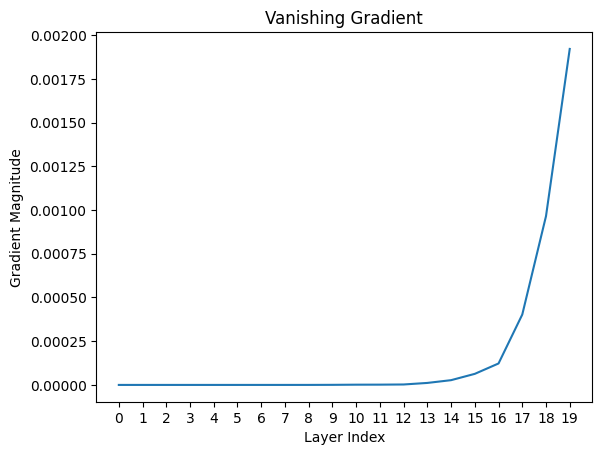

In [3]:
input_data = torch.randn(32, 10)

model = DeepNet()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

outputs = model(input_data)

loss = criterion(outputs, torch.ones(32, 1))
loss.backward()

gradient_magnitudes = [layer.weight.grad.abs().mean().item() for layer in model.layers]

plt.plot(range(len(model.layers)), gradient_magnitudes)
plt.xticks(range(len(model.layers)))
plt.xlabel("Layer Index")
plt.ylabel("Gradient Magnitude")
plt.title("Vanishing Gradient")
plt.show()

In [4]:
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.layers = nn.ModuleList([nn.Linear(10 if i == 0 else 50, 50) for i in range(20)])
        self.final_layer = nn.Linear(50, 1)
        
        for layer in self.layers:
            init.kaiming_uniform_(layer.weight, nonlinearity='relu')
            # init.kaiming_normal_(layer.weight, nonlinearity='relu')
            if layer.bias is not None:
                init.zeros_(layer.bias)

    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        return self.final_layer(x)

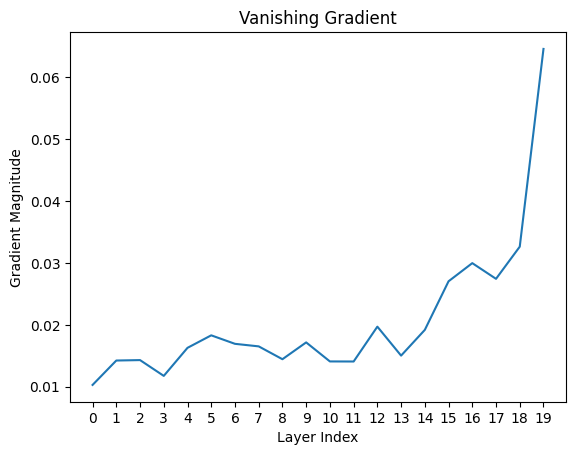

In [5]:
input_data = torch.randn(32, 10)

model = DeepNet()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

outputs = model(input_data)

loss = criterion(outputs, torch.ones(32, 1))
loss.backward()

gradient_magnitudes = [layer.weight.grad.abs().mean().item() for layer in model.layers]

plt.plot(range(len(model.layers)), gradient_magnitudes)
plt.xticks(range(len(model.layers)))
plt.xlabel("Layer Index")
plt.ylabel("Gradient Magnitude")
plt.title("Vanishing Gradient")
plt.show()

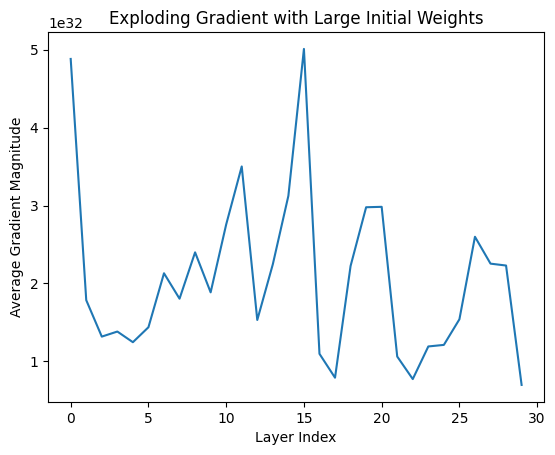

In [6]:
class ExplodingNet(nn.Module):
    def __init__(self):
        super(ExplodingNet, self).__init__()
        self.layers = nn.ModuleList()
        for _ in range(30):
            self.layers.append(nn.Linear(10, 10))

            with torch.no_grad():
                for param in self.layers[-1].parameters():
                    param *= 10

    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        return x

model = ExplodingNet()
data = torch.randn(5, 10)
target = torch.randn(5, 10)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

output = model(data)
loss = criterion(output, target)
loss.backward()

gradient_magnitudes = [sum([param.grad.abs().mean().item() for param in layer.parameters()]) / len(list(layer.parameters())) for layer in model.layers]


plt.plot(gradient_magnitudes)
plt.xlabel("Layer Index")
plt.ylabel("Average Gradient Magnitude")
plt.title("Exploding Gradient with Large Initial Weights")
plt.show()

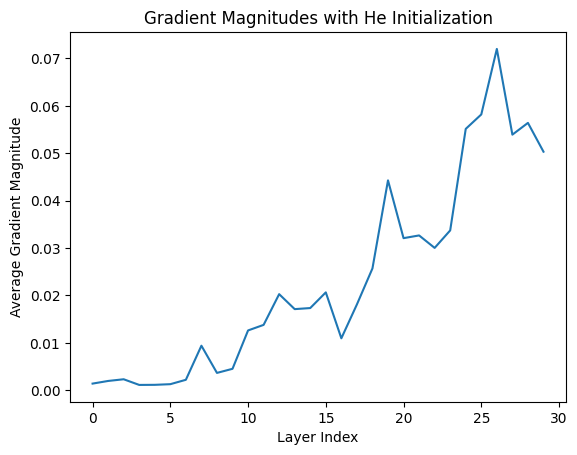

In [7]:
class ExplodingNet(nn.Module):
    def __init__(self):
        super(ExplodingNet, self).__init__()
        self.layers = nn.ModuleList()
        for _ in range(30):
            layer = nn.Linear(10, 10)
            nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')
            self.layers.append(layer)

    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        return x

model = ExplodingNet()
data = torch.randn(5, 10)
target = torch.randn(5, 10)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

output = model(data)
loss = criterion(output, target)
loss.backward()

gradient_magnitudes = [sum([param.grad.abs().mean().item() for param in layer.parameters()]) / len(list(layer.parameters())) for layer in model.layers]

plt.plot(gradient_magnitudes)
plt.xlabel("Layer Index")
plt.ylabel("Average Gradient Magnitude")
plt.title("Gradient Magnitudes with He Initialization")
plt.show()
